In [14]:
# 1.0 Collecte et Exploration des Données
## Charger le dataset et explorer ses caractéristiques.
import pandas

dataframe = pandas.read_csv("Breast Cancer Wisconsin.csv")
dataframe = dataframe.iloc[:, 1:] # exclusion du champs 'id'
## Visualiser les relations entre les caractéristiques et les classes de tumeurs.
dataframe.info()


# Pour rendre notre modèle stable, on utilise
import random, numpy
random.seed(0)
numpy.random.seed(0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave_points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
# 2.0 Prétraitement des Données
## Vérifier s'il y a des valeurs manquantes
print(dataframe.isnull().sum()) # On distingue qu'on a aucune valeur manquante 

## Vérifier s'il y a des valeurs aberrantes
from sklearn.ensemble import IsolationForest
X = dataframe.iloc[:, 1:] 
y = dataframe.iloc[:, 0] 
model = IsolationForest(contamination=0.05)
outliers = model.fit_predict(X) # Les outliers sont marqués par -1
print(len(outliers))

## Normaliser les données si nécessaire.
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
print("Les données avant la normalisation")
print(X)
standard_scaler.fit_transform(X=X)
print("Les données après la normalisation")
print(X)

## Division des données en ensembles d'entraînement et de test.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave_points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave_points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave_points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64
569
Les données avant la normalisation
     radius_mean  texture_mean  perimeter_mean  a

In [16]:
# 3.0 Construction des Modèles & 4.0 Entraînement des Modèles
## Régression linéaire simple      ❌
## Régression linéaire multiple    ❌
## Régression linéaire polynomiale ❌

## Régression logistique ✅
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)
for hyperparameter in [100, 200, 300, 400]:
    log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=hyperparameter)
    log_model.fit(X_train, y_train)
    print(f"{log_model.score(X_test, y_test)} avec max_iter = {hyperparameter}")
best_log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)
best_log_model.fit(X_train, y_train)
print("--------------------------------------")
 

## K-NN ✅
from sklearn.neighbors import KNeighborsClassifier
for hyperparameter in range(3, 11):
    knn_model = KNeighborsClassifier(n_neighbors=hyperparameter, weights='distance', p=2)
    knn_model.fit(X_train, y_train)
    print(f"{knn_model.score(X_test, y_test)} avec n_neighbors = {hyperparameter}")
best_knn_model = KNeighborsClassifier(n_neighbors=6)
best_knn_model.fit(X_train, y_train)
print("--------------------------------------")

## Arbre de Décision ✅   
from sklearn.tree import DecisionTreeClassifier
for hyperparameter in [None, 1, 2, 3, 4, 5, 6]:
    tree_model = DecisionTreeClassifier(max_depth=hyperparameter)
    tree_model.fit(X_train, y_train)
    print(f"{tree_model.score(X_test, y_test)} avec max_depth = {hyperparameter}")
best_tree_model = DecisionTreeClassifier(max_depth=3)
best_tree_model.fit(X_train, y_train)

0.9767441860465116 avec max_iter = 100
0.9767441860465116 avec max_iter = 200
0.9767441860465116 avec max_iter = 300
0.9767441860465116 avec max_iter = 400
--------------------------------------
0.9534883720930233 avec n_neighbors = 3
0.9534883720930233 avec n_neighbors = 4
0.9534883720930233 avec n_neighbors = 5
0.9651162790697675 avec n_neighbors = 6
0.9534883720930233 avec n_neighbors = 7
0.9534883720930233 avec n_neighbors = 8
0.9534883720930233 avec n_neighbors = 9
0.9534883720930233 avec n_neighbors = 10
--------------------------------------
0.8953488372093024 avec max_depth = None
0.8837209302325582 avec max_depth = 1
0.9418604651162791 avec max_depth = 2
0.9651162790697675 avec max_depth = 3
0.9302325581395349 avec max_depth = 4
0.9302325581395349 avec max_depth = 5
0.9302325581395349 avec max_depth = 6


DecisionTreeClassifier(max_depth=3)

Precision score = 1.0
Rappel score = 0.9629629629629629
Score f1 score = 0.9811320754716981


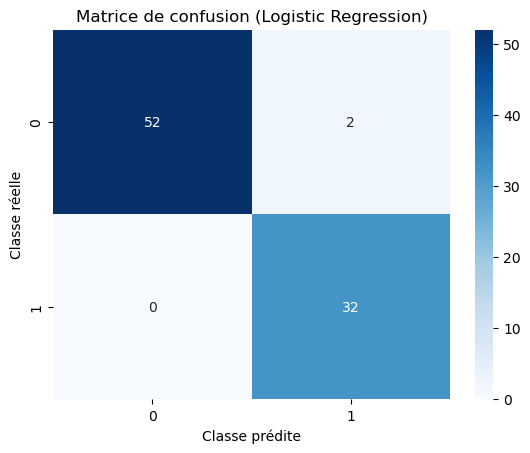

Precision score = 1.0
Rappel score = 0.9444444444444444
Score f1 score = 0.9714285714285714


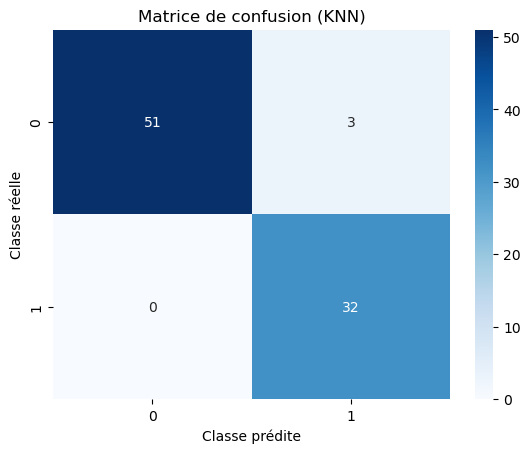

Precision score = 0.9811320754716981
Rappel score = 0.9629629629629629
Score f1 score = 0.9719626168224299


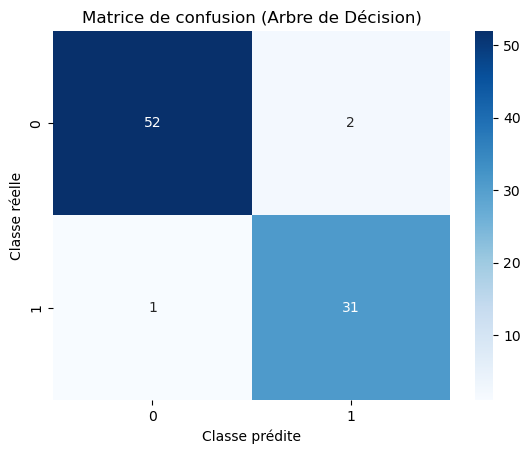

In [17]:
# 5.0 Évaluation des Modèles
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
def evaluate_log_model():
    import matplotlib.pyplot as plt
    import seaborn
    y_predicted = best_log_model.predict(X_test)
    print(f"Precision score = {precision_score(y_test, y_predicted, pos_label='B')}")
    print(f"Rappel score = {recall_score(y_test, y_predicted, pos_label='B')}")
    print(f"Score f1 score = {f1_score(y_test, y_predicted, pos_label='B')}")
    conf_matrix = confusion_matrix(y_test, y_predicted)
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.title("Matrice de confusion (Logistic Regression)")
    plt.show()
evaluate_log_model()

def evaluate_knn_model():
    import matplotlib.pyplot as plt
    import seaborn
    y_predicted = best_knn_model.predict(X_test)
    print(f"Precision score = {precision_score(y_test, y_predicted, pos_label='B')}")
    print(f"Rappel score = {recall_score(y_test, y_predicted, pos_label='B')}")
    print(f"Score f1 score = {f1_score(y_test, y_predicted, pos_label='B')}")
    conf_matrix = confusion_matrix(y_test, y_predicted)
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.title("Matrice de confusion (KNN)")
    plt.show()
evaluate_knn_model()

def evaluate_tree_model():
    import matplotlib.pyplot as plt
    import seaborn
    y_predicted = best_tree_model.predict(X_test)
    print(f"Precision score = {precision_score(y_test, y_predicted, pos_label='B')}")
    print(f"Rappel score = {recall_score(y_test, y_predicted, pos_label='B')}")
    print(f"Score f1 score = {f1_score(y_test, y_predicted, pos_label='B')}")
    conf_matrix = confusion_matrix(y_test, y_predicted)
    seaborn.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel("Classe prédite")
    plt.ylabel("Classe réelle")
    plt.title("Matrice de confusion (Arbre de Décision)")
    plt.show()
evaluate_tree_model()

In [18]:
# 6.0 Interprétation des Résultats
# Les caractéristiques les plus importantes pour la classification des tumeurs sont

# Pour la régression logistique
coefficients = best_log_model.coef_[0]
feature_importance = pandas.Series(coefficients, index=X_train.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)
print("Caractéristiques les plus influentes (régression logistique) :")
print(feature_importance)

# Pour le KNN
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(score_func=f_classif, k=6)
selector.fit(X_train, y_train)
scores = pandas.Series(selector.scores_, index=X_train.columns)
print("Top 10 caractéristiques selon SelectKBest pour KNN :")
print(scores.sort_values(ascending=False))

# Pour l'arbre de décision
importances = pandas.Series(best_tree_model.feature_importances_, index=X_train.columns)
print("Caractéristiques les plus importantes (arbre de décision) :")
print(importances.sort_values(ascending=False))

Caractéristiques les plus influentes (régression logistique) :
radius_mean                3.297047
concavity_worst            2.814846
texture_se                 2.347371
radius_worst               1.944078
compactness_worst          1.851395
concave_points_worst       1.252183
symmetry_worst             1.104781
concavity_mean             1.094641
concave_points_mean        0.624912
compactness_mean           0.604789
smoothness_worst           0.516889
texture_worst              0.471681
symmetry_mean              0.351303
smoothness_mean            0.281489
perimeter_mean             0.231368
perimeter_worst            0.196464
fractal_dimension_worst    0.176190
texture_mean               0.148518
area_se                    0.137366
concave_points_se          0.078083
compactness_se             0.062625
symmetry_se                0.052025
concavity_se               0.050100
perimeter_se               0.045289
smoothness_se              0.030334
area_worst                 0.025772
f

In [19]:
# 7. Déploiement et Utilisation (optionnel)
def get_results():
    import random
    import numpy
    import pandas

    random.seed(0)
    numpy.random.seed(0)

    dataframe = pandas.read_csv("../Breast Cancer Wisconsin.csv")
    dataframe = dataframe.iloc[:, 1:]

    #* outliers
    from sklearn.ensemble import IsolationForest
    X = dataframe.iloc[:, 1:] 
    y = dataframe.iloc[:, 0] 
    model = IsolationForest(contamination=0.05)
    outliers = model.fit_predict(X)

    #* standard scaling
    from sklearn.preprocessing import StandardScaler
    standard_scaler = StandardScaler()
    standard_scaler.fit_transform(X=X)

    #* splitting data
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.85)

    #* LogisticRegression model
    from sklearn.linear_model import LogisticRegression
    best_log_model = LogisticRegression(solver='liblinear', C=10.0, random_state=0, max_iter=100)
    best_log_model.fit(X_train, y_train)

    #* K-NN model
    from sklearn.neighbors import KNeighborsClassifier
    best_knn_model = KNeighborsClassifier(n_neighbors=6)
    best_knn_model.fit(X_train, y_train)

    #* DecisionTreeClassifier model
    from sklearn.tree import DecisionTreeClassifier
    best_tree_model = DecisionTreeClassifier(max_depth=3)
    best_tree_model.fit(X_train, y_train)


    #* 7. Déploiement et Utilisation (optionnel)
    import openpyxl
    import openpyxl.utils
    import csv 

    def french2english(word):
        translated_names = {
            "Rayon moyen"                  : "radius_mean",
            "Texture moyenne"              : "texture_mean",
            "Périmètre moyen"              : "perimeter_mean",
            "Aire moyenne"                 : "area_mean",
            "Lissé moyen"                  : "smoothness_mean",
            "Compacité moyenne"            : "compactness_mean",
            "Concavité moyenne"            : "concavity_mean",
            "Points concaves moyens"       : "concave_points_mean",
            "Symétrie moyenne"             : "symmetry_mean",
            "Dimension fractale moyenne"   : "fractal_dimension_mean",
            "Écart type rayon"             : "radius_se",
            "Écart type texture"           : "texture_se",
            "Écart type périmètre"         : "perimeter_se",
            "Écart type aire"              : "area_se",
            "Écart type lissé"             : "smoothness_se",
            "Écart type compacité"         : "compactness_se",
            "Écart type concavité"         : "concavity_se",
            "Écart type points concaves"   : "concave_points_se",
            "Écart type symétrie"          : "symmetry_se",
            "Écart type dimension fractale": "fractal_dimension_se",
            "Rayon pire"                   : "radius_worst",
            "Texture pire"                 : "texture_worst",
            "Périmètre pire"               : "perimeter_worst",
            "Aire pire"                    : "area_worst",
            "Lissé pire"                   : "smoothness_worst",
            "Compacité pire"               : "compactness_worst",
            "Concavité pire"               : "concavity_worst",
            "Points concaves pires"        : "concave_points_worst",
            "Symétrie pire"                : "symmetry_worst",
            "Dimension fractale pire"      : "fractal_dimension_worst"
        } 
        for frenchname, englishname in translated_names.items():
            if(word == frenchname):
                return englishname

    workbook = openpyxl.load_workbook("./UserInput.xlsx")
    sheet    = workbook.active

    names = []
    for index in range(2, (sheet.max_row + 1)):
        names.append(french2english(sheet[f"A{index}"].value))

    patients_values = []
    for i in range(2, (sheet.max_column + 1)):
        column_letter = openpyxl.utils.get_column_letter(i)
        patient_values = []
        for j in range(2, (sheet.max_row + 1)):
            if(sheet[f"{column_letter}{j}"].value != None):
                patient_values.append(sheet[f"{column_letter}{j}"].value)
            
        patients_values.append(patient_values)

    with open("./UserInput.csv", "w", newline="") as file:
        writer = csv.writer(file)
        writer.writerow(names)
        for patient_values in patients_values:
            writer.writerow(patient_values)

    return best_knn_model.predict(pandas.read_csv("./UserInput.csv"))